<a href="https://colab.research.google.com/github/Sneha-Gupta-10/DLM-ANN-Project/blob/main/ANN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# File ID from Google Drive link
sg47_file_id = '1-mdmgqVhtp3fqMKuDK1yBzV6MH2OiXYj'

# Construct the download URL
sg47_download_url = f'https://drive.google.com/uc?id={sg47_file_id}'

# Load the dataset
sg47_DigitalMarketingCampaigns_data = pd.read_csv(sg47_download_url)
sg47_DigitalMarketingCampaigns_data

,campaign_id,company_size,industry,marketing_channel,ad_spend,duration,target_audience_area,target_audience_age,region,device,operating_system,browser,engagement_metric,conversion_rate,success,budget_allocation,audience_reach,device_conversion_rate,os_conversion_rate,browser_conversion_rate
0,1,<=50,manufacturing,email,41484,71,suburban,18-34,Europe,tablet,Android,Safari,12547,0.141545,Yes,584.281690,12547.00000,0.7,0.8,0.7
1,2,100+,services,influencer,23155,13,urban,55+,Africa,mobile,Android,Chrome,155190,0.498372,Yes,1781.153846,258650.00000,0.8,0.8,0.9
2,3,51-100,services,content marketing,25838,68,suburban,18-34,North America,tablet,iOS,Chrome,125296,0.213533,Yes,379.970588,139217.77780,0.7,0.9,0.9
3,4,<=50,technology,content marketing,28154,60,suburban,35-54,South America,mobile,Windows,Chrome,121101,0.297614,Yes,469.233333,151376.25000,0.8,0.7,0.9
4,5,<=50,manufacturing,search engine,49035,58,rural,35-54,Asia-Pacific,tablet,iOS,Firefox,482402,0.604580,Yes,845.431035,689145.71430,0.7,0.9,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,100+,finance,content marketing,20737,75,urban,35-54,Africa,desktop,iOS,Firefox,17011,0.780359,Yes,276.493333,14175.83333,0.9,0.9,0.8
9996,9997,100+,e-commerce,email,43832,73,urban,18-34,Africa,tablet,Android,Firefox,392236,0.014689,No,600.438356,490295.00000,0.7,0.8,0.8
9997,9998,100+,services,influencer,41582,62,rural,35-54,North America,tablet,iOS,Firefox,345036,0.218987,Yes,670.677419,492908.57140,0.7,0.9,0.8
9998,9999,<=50,manufacturing,content marketing,6703,26,suburban,18-34,Asia-Pacific,mobile,iOS,Chrome,159783,0.703098,Yes,257.807692,266305.00000,0.8,0.9,0.9


In [6]:
# Step 2: Data Preprocessing
sg47_DigitalMarketingCampaigns_data.drop(columns=['campaign_id'], inplace=True)  # Remove unnecessary ID column

In [18]:
# Encode categorical variables using Ordinal Encoding
sg47_categorical_cols = ['company_size', 'industry', 'marketing_channel', 'target_audience_area','target_audience_age',
                          'region', 'device', 'operating_system', 'browser','success']
sg47_ordinal_encoder = OrdinalEncoder()
sg47_DigitalMarketingCampaigns_data[sg47_categorical_cols] = sg47_ordinal_encoder.fit_transform(sg47_DigitalMarketingCampaigns_data[sg47_categorical_cols])
sg47_DigitalMarketingCampaigns_data

,company_size,industry,marketing_channel,ad_spend,duration,target_audience_area,target_audience_age,region,device,operating_system,browser,engagement_metric,conversion_rate,success,budget_allocation,audience_reach,device_conversion_rate,os_conversion_rate,browser_conversion_rate
0,2.0,3.0,1.0,0.810805,0.780488,1.0,0.0,2.0,2.0,0.0,2.0,0.024896,0.141459,1.0,0.077025,0.014873,0.0,0.5,0.0
1,0.0,5.0,2.0,0.403458,0.073171,2.0,2.0,0.0,1.0,0.0,0.0,0.310269,0.498325,1.0,0.251596,0.310613,0.5,0.5,1.0
2,1.0,5.0,0.0,0.463086,0.743902,1.0,0.0,3.0,2.0,2.0,0.0,0.250463,0.213456,1.0,0.047225,0.167093,0.0,1.0,1.0
3,2.0,6.0,0.0,0.514557,0.646341,1.0,1.0,4.0,1.0,1.0,0.0,0.242070,0.297545,1.0,0.060245,0.181703,0.5,0.0,1.0
4,2.0,3.0,3.0,0.978620,0.621951,0.0,1.0,1.0,2.0,2.0,1.0,0.964893,0.604544,1.0,0.115115,0.827937,0.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,0.349720,0.829268,2.0,1.0,0.0,0.0,2.0,1.0,0.033826,0.780343,1.0,0.032132,0.016831,1.0,1.0,0.5
9996,0.0,0.0,1.0,0.862988,0.804878,2.0,0.0,0.0,2.0,0.0,1.0,0.784506,0.014589,0.0,0.079382,0.588979,0.0,0.5,0.5
9997,0.0,5.0,2.0,0.812983,0.670732,0.0,1.0,3.0,2.0,2.0,1.0,0.690077,0.218910,1.0,0.089626,0.592120,0.0,1.0,0.5
9998,2.0,3.0,0.0,0.037826,0.231707,1.0,0.0,1.0,1.0,2.0,0.0,0.319458,0.703074,1.0,0.029407,0.319812,0.5,1.0,1.0


In [19]:
# Normalize numerical features using Min-Max Scaling
sg47_numerical_cols = ['ad_spend', 'duration', 'engagement_metric', 'conversion_rate',
                        'budget_allocation', 'audience_reach', 'device_conversion_rate',
                        'os_conversion_rate', 'browser_conversion_rate']
sg47_scaler = MinMaxScaler()
sg47_DigitalMarketingCampaigns_data[sg47_numerical_cols] = sg47_scaler.fit_transform(sg47_DigitalMarketingCampaigns_data[sg47_numerical_cols])
sg47_DigitalMarketingCampaigns_data

,company_size,industry,marketing_channel,ad_spend,duration,target_audience_area,target_audience_age,region,device,operating_system,browser,engagement_metric,conversion_rate,success,budget_allocation,audience_reach,device_conversion_rate,os_conversion_rate,browser_conversion_rate
0,2.0,3.0,1.0,0.810805,0.780488,1.0,0.0,2.0,2.0,0.0,2.0,0.024896,0.141459,1.0,0.077025,0.014873,0.0,0.5,0.0
1,0.0,5.0,2.0,0.403458,0.073171,2.0,2.0,0.0,1.0,0.0,0.0,0.310269,0.498325,1.0,0.251596,0.310613,0.5,0.5,1.0
2,1.0,5.0,0.0,0.463086,0.743902,1.0,0.0,3.0,2.0,2.0,0.0,0.250463,0.213456,1.0,0.047225,0.167093,0.0,1.0,1.0
3,2.0,6.0,0.0,0.514557,0.646341,1.0,1.0,4.0,1.0,1.0,0.0,0.242070,0.297545,1.0,0.060245,0.181703,0.5,0.0,1.0
4,2.0,3.0,3.0,0.978620,0.621951,0.0,1.0,1.0,2.0,2.0,1.0,0.964893,0.604544,1.0,0.115115,0.827937,0.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,0.349720,0.829268,2.0,1.0,0.0,0.0,2.0,1.0,0.033826,0.780343,1.0,0.032132,0.016831,1.0,1.0,0.5
9996,0.0,0.0,1.0,0.862988,0.804878,2.0,0.0,0.0,2.0,0.0,1.0,0.784506,0.014589,0.0,0.079382,0.588979,0.0,0.5,0.5
9997,0.0,5.0,2.0,0.812983,0.670732,0.0,1.0,3.0,2.0,2.0,1.0,0.690077,0.218910,1.0,0.089626,0.592120,0.0,1.0,0.5
9998,2.0,3.0,0.0,0.037826,0.231707,1.0,0.0,1.0,1.0,2.0,0.0,0.319458,0.703074,1.0,0.029407,0.319812,0.5,1.0,1.0


In [20]:
# Step 3: Split dataset into training and testing
sg47_X = sg47_DigitalMarketingCampaigns_data.drop(columns=['success'])
sg47_y = sg47_DigitalMarketingCampaigns_data['success']
sg47_X_train, sg47_X_test, sg47_y_train, sg47_y_test = train_test_split(sg47_X, sg47_y, test_size=0.2, random_state=5504714)

In [21]:
# Step 4: Build ANN Model
sg47_model = Sequential([
    Dense(64, activation='relu', input_shape=(sg47_X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

sg47_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Step 5: Train Model
sg47_history = sg47_model.fit(sg47_X_train, sg47_y_train, epochs=50, batch_size=16, validation_data=(sg47_X_test, sg47_y_test), verbose=1)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8729 - loss: 0.3872 - val_accuracy: 0.8865 - val_loss: 0.3572
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8969 - loss: 0.3365 - val_accuracy: 0.8865 - val_loss: 0.3572
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8956 - loss: 0.3381 - val_accuracy: 0.8865 - val_loss: 0.3539
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9000 - loss: 0.3282 - val_accuracy: 0.8865 - val_loss: 0.3542
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9073 - loss: 0.3086 - val_accuracy: 0.8865 - val_loss: 0.3596
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9035 - loss: 0.3192 - val_accuracy: 0.8865 - val_loss: 0.3542
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8973 - loss: 0.3307 - val_accuracy: 0.8865 - val_loss: 0.3525
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9026 - loss: 0.3171 - val_accuracy: 0.

In [23]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [24]:
import streamlit as st
print("Streamlit imported successfully!")

Streamlit imported successfully!


In [25]:
# Step 6: Streamlit Dashboard Code
def sg47_run_dashboard():
    st.title("Digital Marketing Campaign Success Prediction")

    # Sidebar for hyperparameters
    epochs = st.sidebar.slider("Epochs", 10, 100, step=10, value=50)
    batch_size = st.sidebar.slider("Batch Size", 8, 64, step=8, value=16)

    # Model accuracy display
    accuracy = sg47_model.evaluate(sg47_X_test, sg47_y_test, verbose=0)[1]
    st.metric(label="Model Accuracy", value=f"{accuracy*100:.2f}%")

    # Visualizations
    st.subheader("Model Accuracy Over Epochs")
    fig, ax = plt.subplots()
    ax.plot(sg47_history.history['accuracy'], label='Train Accuracy')
    ax.plot(sg47_history.history['val_accuracy'], label='Validation Accuracy')
    ax.legend()
    ax.set_title("Model Accuracy")
    st.pyplot(fig)

    st.subheader("Confusion Matrix")
    sg47_y_pred = (sg47_model.predict(sg47_X_test) > 0.5).astype("int32")
    fig, ax = plt.subplots()
    sns.heatmap(pd.crosstab(sg47_y_test, sg47_y_pred.ravel()), annot=True, fmt='d', ax=ax)
    ax.set_title("Confusion Matrix")
    st.pyplot(fig)

    # Prediction button
    if st.button("Predict on Test Data"):
        st.write("Predictions:", sg47_y_pred[:10])

2025-03-21 12:14:30.257 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:30.435 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-21 12:14:30.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:30.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:30.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:30.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:30.442 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:30.443 Thread 'MainThread': mi

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-03-21 12:14:31.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:31.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:31.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:31.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:31.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:31.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:31.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 12:14:31.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

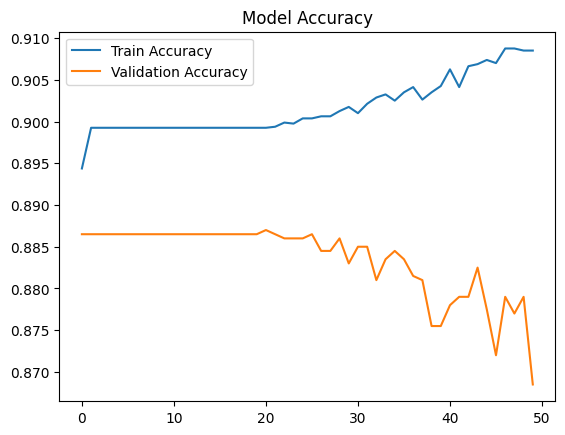

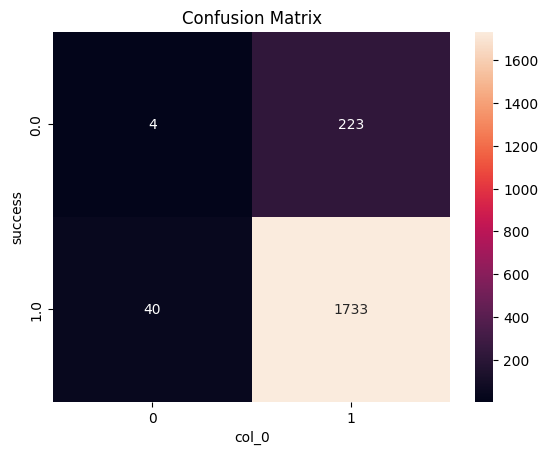

In [26]:
# Run Streamlit
if __name__ == "__main__":
    sg47_run_dashboard()